<a href="https://colab.research.google.com/github/Shubh9026/EDA-on-the-data-for-customer-purchasing/blob/main/gsoc_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=9250ff4275b0cdbdaaefcabd3b9677ca04a7001a39f578be409341e103c7f6e8
  Stored in directory: /root/.cache/pip/wheels/21/65/ee/4e6672aabfa486d3341a39a04f8f87c77e5156149299b5a7d0
Successfully built whisper


In [2]:
import os
import pandas as pd
from moviepy import VideoFileClip
from pydub import AudioSegment
import whisper
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

def extract_audio(video_path, audio_output_path):
    video = VideoFileClip(video_path)
    video.audio.write_audiofile(audio_output_path, codec="mp3")

def segment_audio(audio_path, chunk_length=5000):
    audio = AudioSegment.from_mp3(audio_path)
    return [audio[i:i + chunk_length] for i in range(0, len(audio), chunk_length)]

def transcribe_audio(chunk, model, temp_audio_path="temp_chunk.mp3"):
    chunk.export(temp_audio_path, format="mp3")
    result = model.transcribe(temp_audio_path)
    return result['text']

def analyze_sentiment(text, sentiment_pipeline):
    result = sentiment_pipeline(text)
    return result[0]['label']

def process_videos_in_folder(video_folder, output_csv):
    video_files = [f for f in os.listdir(video_folder) if f.endswith(".mp4")]

    if not video_files:
        print("No MP4 files found in the folder.")
        return

    # Load Whisper model for speech-to-text
    model = whisper.load_model("base")

    # Load sentiment analysis model
    sentiment_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
    tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
    sentiment_pipeline = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=tokenizer)

    data = []

    for video_filename in video_files:
        video_path = os.path.join(video_folder, video_filename)
        audio_output_path = os.path.join(video_folder, f"{os.path.splitext(video_filename)[0]}_audio.mp3")
        extract_audio(video_path, audio_output_path)

        audio_chunks = segment_audio(audio_output_path)

        for idx, chunk in enumerate(audio_chunks):
            transcription = transcribe_audio(chunk, model)
            sentiment = analyze_sentiment(transcription, sentiment_pipeline)
            timestamp = idx * 5  # Assuming each chunk is 5 seconds

            data.append({
                "video_filename": video_filename,
                "timestamp": f"{timestamp} sec",
                "transcription": transcription,
                "sentiment": sentiment
            })

    df = pd.DataFrame(data)
    df.to_csv(os.path.join(video_folder, output_csv), index=False)
    print(f"Processing complete! Data saved to {output_csv}")

# Example usage
video_folder = "/content/videos"
output_csv = "output_sentiment.csv"
process_videos_in_folder(video_folder, output_csv)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'mp42', 'minor_version': '1', 'compatible_brands': 'isommp41mp42', 'creation_time': '2025-03-04T22:42:51.000000Z'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': 'eng', 'default': True, 'size': [3840, 2160], 'bitrate': 3880, 'fps': 29.96, 'codec_name': 'hevc', 'profile': '(Main)', 'metadata': {'Metadata': '', 'creation_time': '2025-03-04T22:42:51.000000Z', 'handler_name': 'Core Media Video', 'vendor_id': '[0][0][0][0]', 'encoder': 'HEVC Coding'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': 'eng', 'default': True, 'fps': 44100, 'bitrate': 157, 'metadata': {'Metadata': '', 'creation_time': '2025-03-04T22:42:51.000000Z', 'handler_name': 'Core Media Audio', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 357.77, 'bitrate': 4031, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_co

MoviePy - Done.


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/

Processing complete! Data saved to output_sentiment.csv


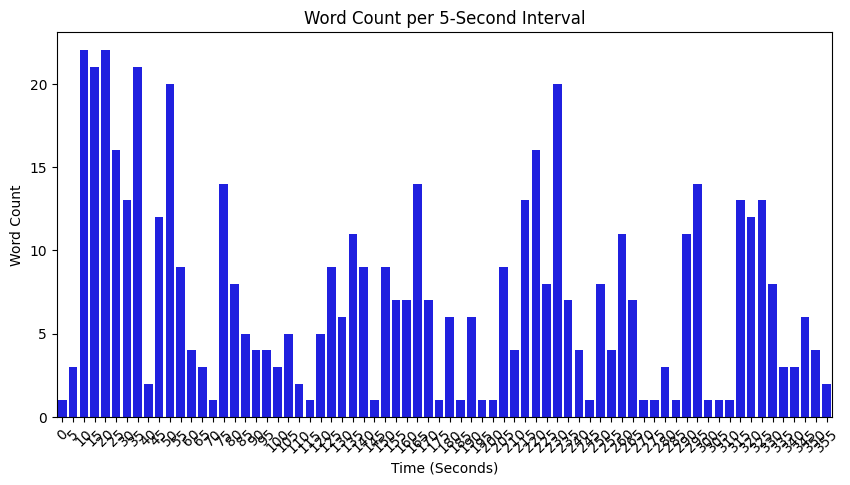

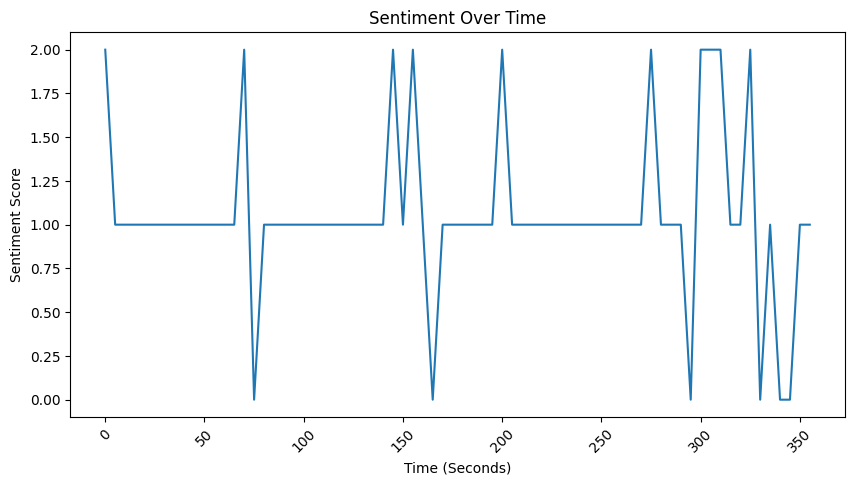

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Transcription Data
df = pd.read_csv("/content/videos/output_sentiment.csv")  # Ensure this file has 'timestamp', 'transcription', 'sentiment'

# Convert timestamp (e.g., "0 sec", "5 sec") to integer
df["timestamp"] = df["timestamp"].str.replace(" sec", "").astype(int)

# **1. Plot Histogram of Word Count per 5-Second Interval**
df["word_count"] = df["transcription"].apply(lambda x: len(str(x).split()))  # Count words per line

plt.figure(figsize=(10, 5))
sns.barplot(x=df["timestamp"], y=df["word_count"], color="blue")
plt.xlabel("Time (Seconds)")
plt.ylabel("Word Count")
plt.title("Word Count per 5-Second Interval")
plt.xticks(rotation=45)
plt.show()

# **2. Plot Sentiment Classification Over Time**
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["timestamp"], y=df["sentiment"].astype("category").cat.codes)
plt.xlabel("Time (Seconds)")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Over Time")
plt.xticks(rotation=45)
plt.show()


In [33]:
!touch requirements.txt

In [34]:
%%writefile requirements.txt
pandas
matplotlib
seaborn
moviepy
pydub
openai-whisper
transformers
torch


Overwriting requirements.txt
